In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [7]:
from sklearn import datasets
iris = datasets.load_iris()

In [8]:
samples = iris.data
samples

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [31]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(samples)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
labels = model.predict(samples)

In [33]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [34]:
xs = samples[:,0]
ys = samples[:,2]

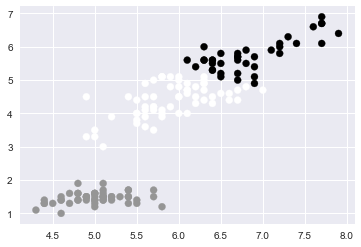

In [35]:
plt.scatter(xs, ys, c=labels)
plt.show()

In [36]:
true_labels = iris.target
print(true_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [40]:
df = pd.DataFrame({'labels': labels, 'species':true_labels})
df.head()

,labels,species
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [43]:
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species   0   1   2
labels             
0         0  48  14
1        50   0   0
2         0   2  36


In [44]:
print(model.inertia_)

78.9408414261


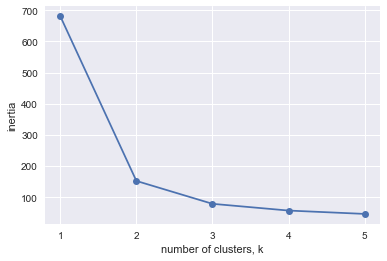

In [45]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(samples)
samples_scaled = scaler.transform(samples)
samples_scaled

array([[ -9.00681170e-01,   1.03205722e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,  -1.24957601e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.38535265e+00,   3.37848329e-01,  -1.39813811e+00,
         -1.31297673e+00],
       [ -1.50652052e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.02184904e+00,   1.26346019e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -5.37177559e-01,   1.95766909e+00,  -1.17067529e+00,
         -1.05003079e+00],
       [ -1.50652052e+00,   8.00654259e-01,  -1.34127240e+00,
         -1.18150376e+00],
       [ -1.02184904e+00,   8.00654259e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.74885626e+00,  -3.56360566e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.44444970e+00],
       [ -5.37177559e-01,   1.49486315e+00,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.26418478e

In [49]:
from sklearn.cluster import KMeans
model1 = KMeans(n_clusters=3)
model1.fit(samples)
labels_scaled = model1.predict(samples)

In [50]:
ct = pd.crosstab(labels_scaled, true_labels)
print(ct)

col_0   0   1   2
row_0            
0       0   2  36
1      50   0   0
2       0  48  14


Dendrogram

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(samples, method='complete')
dendrogram(merging, labels=country_names, leaf_rotation=90, leaf_font_size=6)
plt.show()

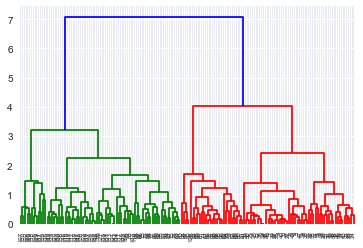

In [58]:
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(samples, method='complete')
dendrogram(mergings, leaf_rotation=90, leaf_font_size=6)
plt.show()

In [4]:
euro = pd.read_csv('./data/eurovision-2016.csv')
euro.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [17]:
from scipy.cluster.hierarchy import linkage, fcluster
mergings = linkage(samples, method='complete')
labels = fcluster(mergings, 1, criterion='distance')
print(labels)

[18 18 19 19 18 22 19 18 19 18 22 23 18 19 21 21 21 18 22 23 22 23 19 23 23
 18 23 18 18 18 18 22 21 21 18 18 22 18 19 18 18 20 19 23 23 18 23 19 22 18
 11 12 11 15 11 14 12 13 11 15 13 14 16 12 15 11 14 14 10 15  8 14  9 12 12
 11 11 11 12 15 15 15 14  9 14 12 11 10 14 15 14 12 14 13 14 14 14 12 13 14
  5  8  1  7  7  2 17  1  7  4  6  9  6  8  8  6  7  3  2 10  5  8  2  9  5
  1  9  8  7  1  1  3  7  9  9  4  5  7  8  6  5  6  8  5  5  6  9  6  5  8]


t-SNE - снижение размерности для простоты визуализации

In [20]:
species = iris.target

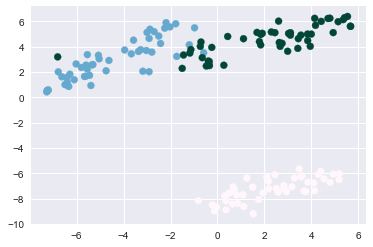

In [26]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(samples)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=species, cmap='PuBuGn')
plt.show()

Dimension reduction

- PCA - principle component analysis

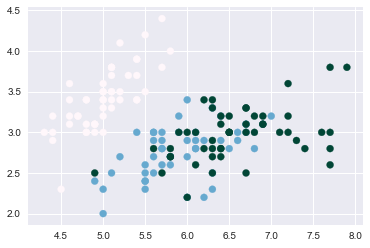

In [32]:
plt.scatter(samples[:,0], samples[:,1], c=species, cmap='PuBuGn')

In [27]:
from sklearn.decomposition import PCA
model = PCA()
model.fit(samples)
transformed = model.transform(samples)
print(transformed)

[[ -2.68420713e+00   3.26607315e-01  -2.15118370e-02   1.00615724e-03]
 [ -2.71539062e+00  -1.69556848e-01  -2.03521425e-01   9.96024240e-02]
 [ -2.88981954e+00  -1.37345610e-01   2.47092410e-02   1.93045428e-02]
 [ -2.74643720e+00  -3.11124316e-01   3.76719753e-02  -7.59552741e-02]
 [ -2.72859298e+00   3.33924564e-01   9.62296998e-02  -6.31287327e-02]
 [ -2.27989736e+00   7.47782713e-01   1.74325619e-01  -2.71468037e-02]
 [ -2.82089068e+00  -8.21045110e-02   2.64251085e-01  -5.00996251e-02]
 [ -2.62648199e+00   1.70405349e-01  -1.58015103e-02  -4.62817610e-02]
 [ -2.88795857e+00  -5.70798026e-01   2.73354061e-02  -2.66154143e-02]
 [ -2.67384469e+00  -1.06691704e-01  -1.91533300e-01  -5.58909660e-02]
 [ -2.50652679e+00   6.51935014e-01  -6.92749958e-02  -1.66082478e-02]
 [ -2.61314272e+00   2.15206320e-02   1.07650353e-01  -1.57704569e-01]
 [ -2.78743398e+00  -2.27740189e-01  -2.00327788e-01  -7.23508674e-03]
 [ -3.22520045e+00  -5.03279909e-01   6.84136292e-02  -2.19466641e-02]
 [ -2.

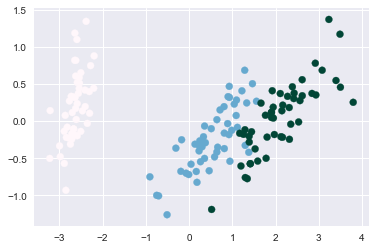

In [33]:
plt.scatter(transformed[:,0], transformed[:,1], c=species, cmap='PuBuGn')